In [0]:
!pip install stellargraph==0.6.0
!pip install graphrole
!pip install python-igraph==0.7.1.post6
!pip install mplleaflet==0.0.5
!pip uninstall tensorflow
!pip install tensorflow-gpu==1.14

"""

!pip install setuptools==39.1.0
!pip install Keras==2.2.3
!pip install tensorflow==1.10.0
!pip install numba==0.39.0
!pip install numpy==1.14.5
!pip install scikit_learn==0.19.2
!pip install matplotlib==2.2.3
!pip install pandas==0.23.4
!pip install gensim==3.4.0
!pip install pytest==3.9.3
!pip install pytest-benchmark==3.1
!pip install pytest-cov==2.6.0
!pip install coveralls==1.5.1
!pip install python-igraph==0.7.1.post6
!pip install mplleaflet==0.0.5

"""


  Using cached https://files.pythonhosted.org/packages/0f/a0/4e7134f803737aa6eebb4e5250565ace0e2599659e22be7f7eba520ff017/python-igraph-0.7.1.post6.tar.gz
  Created wheel for python-igraph: filename=python_igraph-0.7.1.post6-cp36-cp36m-linux_x86_64.whl size=2212693 sha256=5b57a54fec4ff7d25793018761ca5ee1a939e459503f852028a2ad69c751e557
  Stored in directory: /root/.cache/pip/wheels/41/d6/02/34eebae97e25f5b87d60f4c0687e00523e3f244fa41bc3f4a7
Successfully built python-igraph
  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-cp36-none-any.whl size=28556 sha256=a18b3624300644e0f9451e479ee8b05545eb82cbe023458258c00c9be79d62fd
  Stored in directory: /root/.cache/pip/wheels/bf/fd/0b/0513de62c339c4a56e2234aa42a5d06e6660a4446fdae7b796
Successfully built mplleaflet
     |████████████████████████████████| 109.2MB 95kB/s 
     |████████████████████████████████| 3.2MB 22.4MB/s 
     |████████████████████████████████| 491kB 42.9MB/s 
  Found existing installation: tensorboard 2.1.1
    Unins

'\n\n!pip install setuptools==39.1.0\n!pip install Keras==2.2.3\n!pip install tensorflow==1.10.0\n!pip install numba==0.39.0\n!pip install numpy==1.14.5\n!pip install scikit_learn==0.19.2\n!pip install matplotlib==2.2.3\n!pip install pandas==0.23.4\n!pip install gensim==3.4.0\n!pip install pytest==3.9.3\n!pip install pytest-benchmark==3.1\n!pip install pytest-cov==2.6.0\n!pip install coveralls==1.5.1\n!pip install python-igraph==0.7.1.post6\n!pip install mplleaflet==0.0.5\n\n'

In [0]:
import pandas as pd
import numpy as np
import networkx as nx
import igraph as ig

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import preprocessing, feature_extraction, model_selection
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import random

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

import warnings
warnings.filterwarnings('ignore') # supress warnings due to some future deprications

import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import GraphSAGELinkGenerator, GraphSAGENodeGenerator
from stellargraph.layer import GraphSAGE, link_classification
from stellargraph.data import UniformRandomWalk
from stellargraph.data import UnsupervisedSampler
from sklearn.model_selection import train_test_split

import keras 

from stellargraph import globalvar

import mplleaflet
from itertools import count

from graphrole import RecursiveFeatureExtractor


Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')
G = nx.read_edgelist('/content/drive/My Drive/AuthorCollaboration.txt',delimiter="\t", create_using = nx.Graph(), nodetype=str)
print(nx.info(G))
print(nx.number_connected_components(G))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Name: 
Type: Graph
Number of nodes: 13654
Number of edges: 24872
Average degree:   3.6432
1329


In [0]:
'''
print("\n=== Making Features ===")
feature_extractor = RecursiveFeatureExtractor(G)

print("\n=== Getting important features ===")
features = feature_extractor.extract_features()
print(f'\nFeatures extracted from {feature_extractor.generation_count} recursive generations:')
print(features)
'''

nodes = []
degree = []

for i in G.nodes():
    #print (str(G.degree[i]) + "\n")
    nodes.append(i)
    degree.append(G.degree[i])
    
data = {'nodeid': nodes,

        'degree': degree}

features = pd.DataFrame(data,columns=['nodeid',  'degree'])
features = features.set_index('nodeid')
features = features.sort_index()
print(features)

                          degree
nodeid                          
-Han Park                      2
-M Sheng                       1
. -M. Chung                    1
. A. Balinsky                  2
. A. Guest                     1
. A. Harvey                    3
. A. Horvathy                  1
. A. de Azc\'arraga            4
. Adam                         1
. Aghababaei Samani            1
. Aharony                      3
. Aldaya                       2
. Alvarez                      1
. Ambjorn                      1
. Amelino-Camelia              3
. Amorim                       2
. Anazawa                      2
. Angelantonj                  5
. Anselmi                      6
. Aschieri                     1
. Avan                         2
. Awada                        2
. B. Fairlie                   2
. B. Petkova                   1
. B\"ockenhauer                2
. Bakas                        1
. Ballesteros                  4
. Banerjee                     3
. Banks   

In [0]:
# transforming features to be on log scale
node_features = features

In [0]:
# sanity check that there are no misspelled gnames left
set(list(G.nodes())) - set(list(node_features.index.values)) 

set()

In [0]:
# Unsupervised graphSAGE
Gs = sg.StellarGraph(G, node_features=node_features)
print(Gs.info())

StellarGraph: Undirected multigraph
 Nodes: 13654, Edges: 24872

 Node types:
  default: [13654]
    Edge types: default-default->default

 Edge types:
    default-default->default: [24872]



In [0]:
# parameter specification
number_of_walks = 2
length = 5
batch_size = 100
epochs = 2
num_samples = [20, 20]
layer_sizes = [100, 100]
learning_rate = 1e-2

In [0]:
unsupervisedSamples = UnsupervisedSampler(Gs, nodes=G.nodes(), length=length, number_of_walks=number_of_walks)

In [0]:
train_gen = GraphSAGELinkGenerator(Gs, batch_size, num_samples).flow(unsupervisedSamples)

Running GraphSAGELinkGenerator with an estimated 2731 batches generated on the fly per epoch.


In [0]:
assert len(layer_sizes) == len(num_samples)

graphsage = GraphSAGE(
        layer_sizes=layer_sizes, generator=train_gen, bias=True, dropout=0.0, normalize="l2"
    )

In [0]:
# Expose input and output sockets of graphsage, for source and destination nodes:
x_inp_src, x_out_src = graphsage.default_model(flatten_output=False)
x_inp_dst, x_out_dst = graphsage.default_model(flatten_output=False)
# re-pack into a list where (source, destination) inputs alternate, for link inputs:
x_inp = [x for ab in zip(x_inp_src, x_inp_dst) for x in ab]
# same for outputs:
x_out = [x_out_src, x_out_dst]


prediction = link_classification(
        output_dim=1, output_act="sigmoid", edge_embedding_method='ip'
    )(x_out)

link_classification: using 'ip' method to combine node embeddings into edge embeddings


In [0]:
model = keras.Model(inputs=x_inp, outputs=prediction)

model.compile(
        optimizer=keras.optimizers.Adam(lr=learning_rate),
        loss=keras.losses.binary_crossentropy,
        metrics=[keras.metrics.binary_accuracy],
    )


In [0]:
from keras.callbacks import *
filepath="/content/gdrive/My Drive/StellarGraph/epochs:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
history = model.fit_generator(
        train_gen,
        epochs=1,
        verbose=2,
        use_multiprocessing=True,
        workers=2,
        shuffle=True,
    )

Epoch 1/1
 - 445s - loss: 0.5927 - binary_accuracy: 0.7054


In [0]:
history = model.fit_generator(
        train_gen,
        epochs=1,
        verbose=2,
        use_multiprocessing=True,
        workers=5,
        shuffle=True,
    )

Epoch 1/1
 - 459s - loss: 0.5859 - binary_accuracy: 0.7153


In [0]:
history = model.fit_generator(
        train_gen,
        epochs=1,
        verbose=2,
        use_multiprocessing=True,
        workers=10,
        shuffle=True,
    )

Epoch 1/1
 - 465s - loss: 0.5850 - binary_accuracy: 0.7180


In [0]:
history = model.fit_generator(
        train_gen,
        epochs=1,
        verbose=2,
        use_multiprocessing=True,
        workers=1,
        shuffle=True,
    )

Epoch 1/1
 - 454s - loss: 0.5848 - binary_accuracy: 0.7158


In [0]:
# Extracting node embeddings

node_ids = list(Gs.nodes())
node_gen = GraphSAGENodeGenerator(Gs, batch_size, num_samples).flow(node_ids)

In [0]:
embedding_model = keras.Model(inputs=x_inp_src, outputs=x_out_src)

In [0]:
emb = embedding_model.predict_generator(node_gen, workers=4, verbose=1)
node_embeddings = emb[:,0,:]

137/137 [==============================] - 10s 76ms/step


In [0]:
#2D t-sne plot of the resulting node embeddings

#Here we visually check whether embeddings have some underlying cluster structure.


node_embeddings.shape

(13654, 100)

/usr/local/lib/python3.6/dist-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


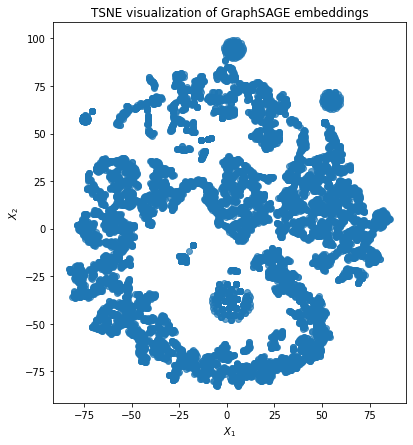

In [0]:
# TSNE visualisation to check whether the embeddings have some structure:
X = node_embeddings
if X.shape[1] > 2:
    transform = TSNE #PCA 

    trans = transform(n_components=2, random_state=123)
    emb_transformed = pd.DataFrame(trans.fit_transform(X), index=node_ids)
else:
    emb_transformed = pd.DataFrame(X, index=node_ids)
    emb_transformed = emb_transformed.rename(columns = {'0':0, '1':1})

alpha = 0.7

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(emb_transformed[0], emb_transformed[1], alpha=alpha)
ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title('{} visualization of GraphSAGE embeddings'.format(transform.__name__))
plt.show()

In [0]:
#t-sne colored by infomap

#We also depict the same t-sne plot colored by infomap communities. As we can observe t-sne of GraphSAGE embeddings do not really separate the infomap communities.


emb_transformed['infomap_clusters'] = emb_transformed.index.map(infomap_com_dict)
plt.scatter(emb_transformed[0], emb_transformed[1], c=emb_transformed['infomap_clusters'], 
            cmap='Spectral', edgecolors='black', alpha=0.3, s=100) 
plt.title("t-sne with colors corresponding to infomap communities")

NameError: ignored

In [0]:
#Pick the hyperparameters, where the clustering results have as little noise points as possible, 
#but also create number of clusters of reasonable size.

# perform dbscan with the chosen parameters:
db = DBSCAN(eps=0.1, min_samples=5).fit(node_embeddings)

In [0]:
#Calculating the clustering statistics:

labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(node_embeddings, labels))

Estimated number of clusters: 10
Estimated number of noise points: 277
Silhouette Coefficient: -0.360


Text(0.5, 1.0, 't-sne with colors corresponding to dbscan cluster. Without noise points')

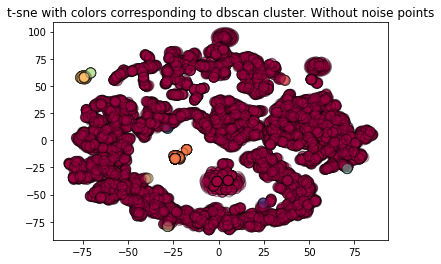

In [0]:
#We plot t-sne again but with the colours corresponding to dbscan points. 

emb_transformed['dbacan_clusters'] = labels
X = emb_transformed[emb_transformed['dbacan_clusters'] != -1]


plt.scatter(X[0], X[1], c=X['dbacan_clusters'], 
            cmap='Spectral', edgecolors='black', alpha=0.3, s=100) 
plt.title("t-sne with colors corresponding to dbscan cluster. Without noise points")